# Ford GoBike System Data exploration
## by Chia_Hung Yen

## Preliminary Wrangling

This data is from lyft bikes that contains the information about the bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_18=[]
for i in range(1,10):
    df_18.append(pd.read_csv('20180{}-fordgobike-tripdata.csv'.format(i)))
df_18.append(pd.read_csv('201810-fordgobike-tripdata.csv'))
df_18.append(pd.read_csv('201811-fordgobike-tripdata.csv'))
df_18.append(pd.read_csv('201812-fordgobike-tripdata.csv'))

In [3]:
# construct dataframe for all the data
df_18 = pd.concat(df_18)

In [4]:
print (df_18.shape)
print (df_18.info())

(1863721, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 213.3+ MB
None


In [5]:
df_18.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [6]:
df_18.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [7]:
df_18.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

Some stations have no id and name. Since we are going to use them, I will let them stay there.

From the information we have now, there are some issues need to fix before further exploration.

In [8]:
# make a copy for dataframe
df_18_clean = df_18.copy()

In [9]:
# change the type of columns
for col in ['start_time', 'end_time']:
    df_18_clean[col] = pd.to_datetime(df_18_clean[col])
df_18_clean['bike_id'] = df_18_clean['bike_id'].astype('str')
type =['Subscriber', 'Customer']
user_type = pd.api.types.CategoricalDtype(ordered = False , categories = type)
df_18['user_type'] = df_18['user_type'].astype(user_type)

In [10]:
# find the month, day, day of the week and start hour
df_18_clean['month'] = df_18_clean['start_time'].dt.month
df_18_clean['day'] = df_18_clean['start_time'].dt.day
df_18_clean['day_of_the_week'] = df_18_clean['start_time'].apply(lambda x: x.dayofweek)
df_18_clean['start_hr'] = df_18_clean["start_time"].apply(lambda x: x.hour)

In [11]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for i in range(len(month)):
    df_18_clean['month'].replace(i+1,month[i],inplace = True)
for i in range(len(day)):
    df_18_clean['day_of_the_week'].replace(i,day[i],inplace = True)

In [12]:
df_18_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  month                    object        
 15  day                      int64         
 16  day_of_the_week          object        
 17  start_hr                 int

In [13]:
df_18_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day,day_of_the_week,start_hr
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Jan,31,Wed,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Jan,31,Wed,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Jan,31,Wed,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Jan,31,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Jan,31,Wed,19


In [14]:
df_18_clean.user_type.value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

In [15]:
df_18_clean.bike_share_for_all_trip.value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

In [16]:
# save to file
df_18_clean.to_csv('gobike_2018.csv', index=False, encoding = 'utf-8')

### What is the structure of your dataset?

>  There are 1863721 bike rental records in 2018 with 14 features. This dataset include id, time, name and location of stations, bike id for each rental, and also the type of user whether they are enrolled in the Bike Share for All program.

### What is/are the main feature(s) of interest in your dataset?

>  I am most interested in figuring out which day of the week are most trips taken in 2018.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the start time and end time will be the main features needed. I also think that user type will also related to the usage of the system.

## Univariate Exploration

I will start by looking to the usage of each day of the week

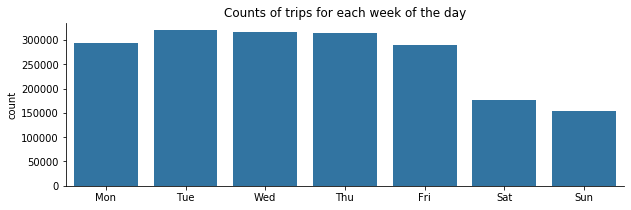

In [17]:
# plot the usage by day of the week
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'day_of_the_week', color = sb.color_palette()[0], order = day);
plt.title('Counts of trips for each week of the day')
ax.set_xlabel('')
sb.despine();

There are more users in weekdays than weekend, so the most of users should be bike commuters. Since the major users might be commuters, I want to look if there is a special trend in starting hour of each trip.

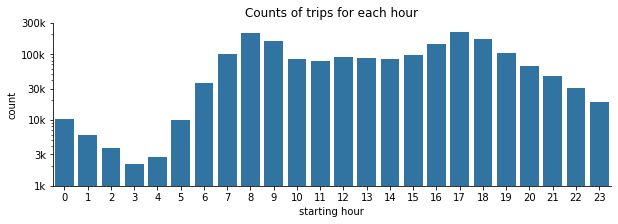

In [18]:
# plot the usage by each hour
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'start_hr', color = sb.color_palette()[0])
plt.title('Counts of trips for each hour')
plt.yscale('log')
plt.yticks([1e3, 3e3, 1e4, 3e4, 1e5, 3e5], ['1k', '3k', '10k', '30k', '100k', '300k'])
ax.set_xlabel('starting hour')
sb.despine();

As I expect, most of the trips are taken in 7-9 am and 4-6 pm, which are all peak hours. Next, I want to take a look at the trips for each day and month in 2018.

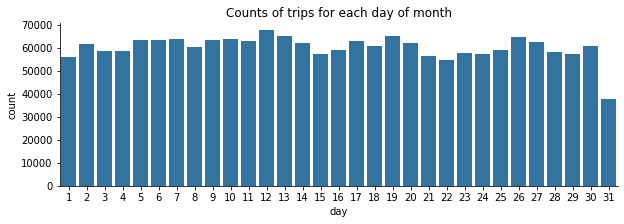

In [19]:
# plot the usage by each day of month
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'day', color = sb.color_palette()[0]);
plt.title('Counts of trips for each day of month')
sb.despine();

The distribution looks normal with the similar pattern for every 7 days. Since there are only 7 months have 31st, it is normal to have fewer users.

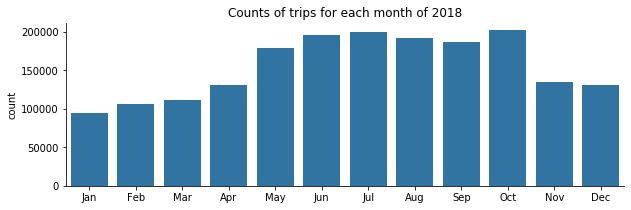

In [20]:
# plot the usage by month of the year
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'month', color = sb.color_palette()[0], order = month);
plt.title('Counts of trips for each month of 2018')
ax.set_xlabel('')
sb.despine();

Most of the trips are from May to October, and decreased from November to April. This might be caused by the rainy season of San Francisco Bay area. Next, I want to take a look at how many users are subscriber.

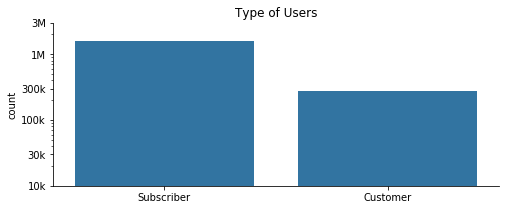

In [21]:
# plot the type of users
fig, ax = plt.subplots(figsize = (8,3))
sb.countplot(data = df_18_clean, x = 'user_type', color = sb.color_palette()[0])
plt.title('Type of Users')
plt.yscale('log')
plt.yticks([1e4, 3e4, 1e5, 3e5, 1e6, 3e6], ['10k', '30k', '100k', '300k', '1M', '3M'])
ax.set_xlabel('')
sb.despine();

Most of the users are subscribers. Since most of the users might be commuters, it is cheaper for them if they subscribe. Lastly, I want to take a look at how many users are in bike share for all program.

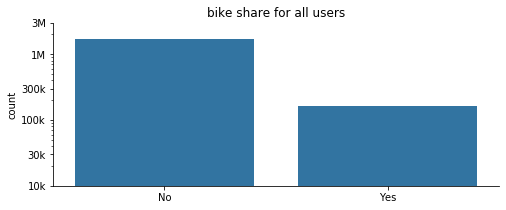

In [22]:
# plot the bike share for all users
fig, ax = plt.subplots(figsize = (8,3))
sb.countplot(data = df_18_clean, x = 'bike_share_for_all_trip', color = sb.color_palette()[0])
plt.title('bike share for all users')
plt.yscale('log')
plt.yticks([1e4, 3e4, 1e5, 3e5, 1e6, 3e6], ['10k', '30k', '100k', '300k', '1M', '3M'])
ax.set_xlabel('')
sb.despine();

The portion of users in bike share for all program is small, with fewer than 250 thousand users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The most of the trips are taken in the rush hours of weekdays from May to October, and most of the users are subscribers.
I didn't find unusual points in this dataset. While looking at the count of trips for each hour, type and the bike share for all program users, I use the log trandfrom because of the large range of values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In order to look for time of day, day of the week or month of the year, I extract the needed information using datatime function into separate columns.

## Bivariate Exploration

First, I want to look at the trips taken by subscribers and customers by each day of the week.

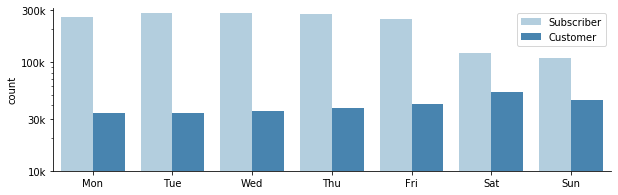

In [23]:
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'day_of_the_week', hue = 'user_type', palette = 'Blues', order = day)
ax.set_xlabel('')
plt.yscale('log')
plt.yticks([1e4, 3e4, 1e5, 3e5], ['10k', '30k', '100k', '300k'])
plt.legend(title = '')
sb.despine();

Subscribers take more trips in weekdays, but more non-subscribers use the system in weekends. This result is as expected that there are fewer commuters in weekends and non-subscribers are using this system for leisure and entertainment. Next, I want to take a look at the trips taken by the bike share for all user by each day of the week.

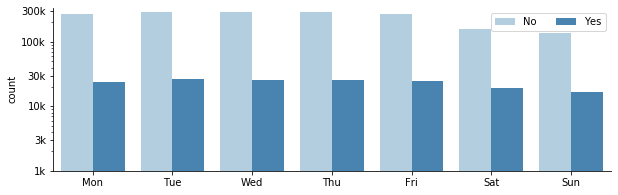

In [24]:
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'day_of_the_week', hue = 'bike_share_for_all_trip', palette = 'Blues', order = day)
ax.set_xlabel('')
plt.yscale('log')
plt.yticks([1e3, 3e3, 1e4, 3e4, 1e5, 3e5], ['1k', '3k', '10k', '30k', '100k', '300k'])
plt.legend(title = '', ncol = 2)
sb.despine();

The plot also shows some drop during weekends for bike share for all users. Next, I want to take a look at the change of trips taken by the subscribers and others for each month.

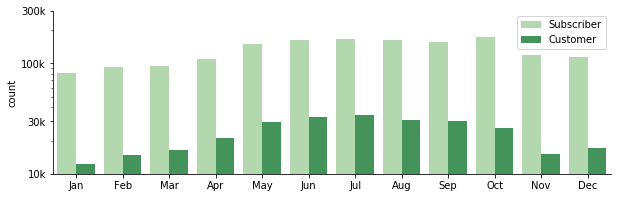

In [25]:
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'month', hue = 'user_type', palette = 'Greens', order = month)
ax.set_xlabel('')
plt.yscale('log')
plt.yticks([1e4, 3e4, 1e5, 3e5], ['10k', '30k', '100k', '300k'])
plt.legend(title = '')
sb.despine();

Seems that the subsribers and non subscribers both have more trips from May to October. Then, I want to look at trips for bike share for all users by each month.

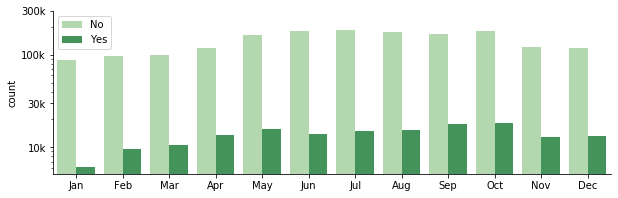

In [26]:
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'month', hue = 'bike_share_for_all_trip', palette = 'Greens', order = month)
ax.set_xlabel('')
plt.yscale('log')
plt.yticks([1e4, 3e4, 1e5, 3e5], ['10k', '30k', '100k', '300k'])
plt.legend(title = '')
sb.despine();

This result shows the same pattern with the above plot. Since they have the similar trend, I guess that most of the user in program are subscribers. So, I want to see how many users in program are subscribers.

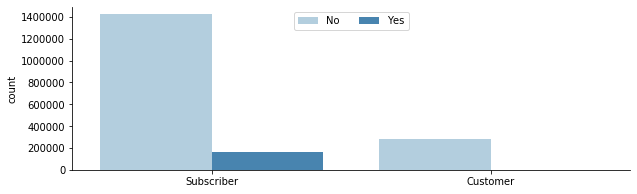

In [27]:
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'user_type', hue = 'bike_share_for_all_trip', palette = 'Blues')
ax.set_xlabel('')
plt.legend(title = '', ncol = 2)
sb.despine();

As expected, all user in the program are subscribers. 

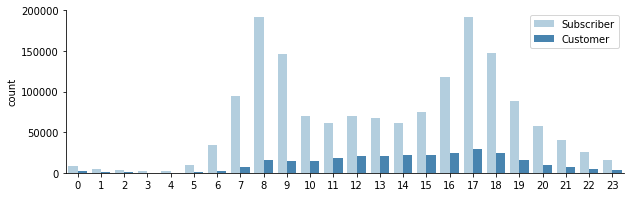

In [28]:
fig, ax = plt.subplots(figsize = (10,3))
sb.countplot(data = df_18_clean, x = 'start_hr', hue = 'user_type', palette = 'Blues')
ax.set_xlabel('')
plt.legend(title = '')
sb.despine();

The plot shows that most of subscribers uses bike during rush hours. However, non subscribers distributed evenly during daytime only with a slight increase during rush hours in evening.
Next, I want to see how many trips are taken by each user types for each month.

In [29]:
# prepare the data for heatmap
df_week = df_18_clean.groupby(['day_of_the_week','month'], as_index = False)['bike_id'].count()
ordinal_var_dict = {'day_of_the_week':day,'month':month}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_week[var] = df_week[var].astype(ordered_var)


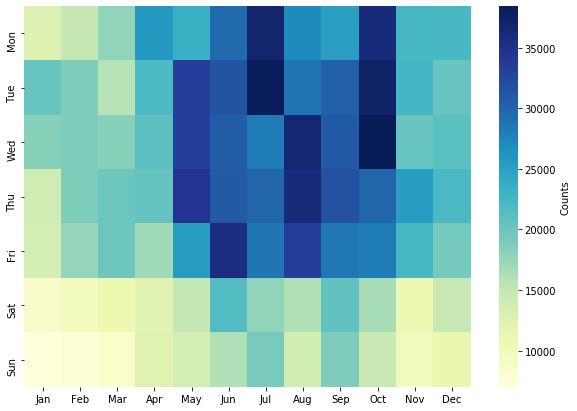

In [30]:
# plot heat map
heatmap = pd.pivot_table(df_week, values='bike_id', index=['day_of_the_week'], columns='month')
fig, ax = plt.subplots(figsize = (10,7))
sb.heatmap(heatmap, cmap="YlGnBu",cbar_kws={'label': 'Counts'})
ax.set_xlabel('')
ax.set_ylabel('');

The weekends of June, July and September have more users compare to other months. Each month has different distribution of the usages, however, some of the month have two or three days with higher trip counts in a row. Next, I want to look at the trips of  each day by each month. 

In [31]:
# prepare the data for heatmap
df_day = df_18_clean.groupby(['day','month'], as_index = False)['bike_id'].count()
ordinal_var_dict = {'month':month}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_day[var] = df_day[var].astype(ordered_var)

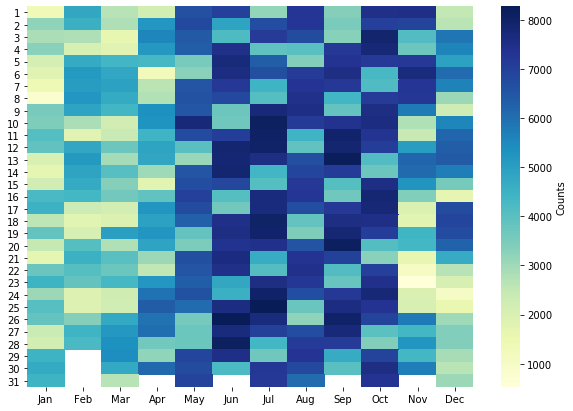

In [32]:
heatmap = pd.pivot_table(df_day, values='bike_id', index='day', columns='month')
fig, ax = plt.subplots(figsize = (10,7))
sb.heatmap(heatmap, cmap="YlGnBu",cbar_kws={'label': 'Counts'})
ax.set_xlabel('')
ax.set_ylabel('');

This heatmap clearly shows that 5 days of higher counts follow by the 2 days of lower counts from May to October, which is consistent with the finding from the last heatmap. The only day that doesn't follow this rule is 4th, July, which is the independence day. Next, I want to look at the peak hour of each day of the week.

In [33]:
# prepare the data for heatmap
df_hr= df_18_clean.groupby(['day_of_the_week','start_hr'], as_index = False)['bike_id'].count()
ordinal_var_dict = {'day_of_the_week':day}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_hr[var] = df_hr[var].astype(ordered_var)

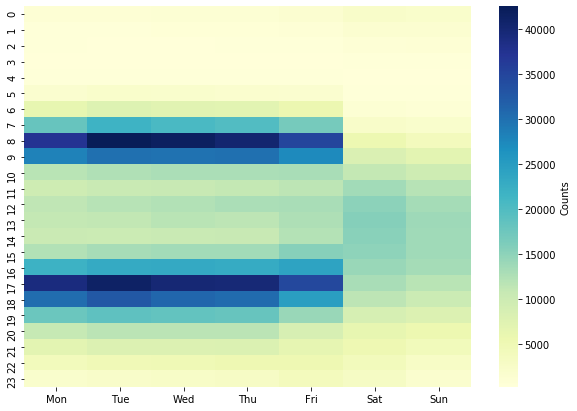

In [34]:
heatmap = pd.pivot_table(df_hr, values='bike_id', index='start_hr', columns='day_of_the_week')
fig, ax = plt.subplots(figsize = (10,7))
sb.heatmap(heatmap, cmap="YlGnBu",cbar_kws={'label': 'Counts'})
ax.set_xlabel('')
ax.set_ylabel('');

Most of the trips are made during the rush hours on weekdays, and afternoon for weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The trips taken for each day of the month correspond with the day of the week for each month. And since all users in bike share for all program are subscribers, I will analyze the type of user only.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the results are expected, the interesting relationship I found is that most of the non subscribers use the system during weekends, which is just the contrary of subscribers.

## Multivariate Exploration
First, I want to look at the trips taken by type of user for day of the week in each month.

In [35]:
# prepare the data for heatmap
df_user_day = df_18_clean.groupby(['day_of_the_week','month','user_type'], as_index = False)['bike_id'].count()
ordinal_var_dict = {'day_of_the_week':day,'month':month}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_user_day[var] = df_user_day[var].astype(ordered_var)
df_sub_day = df_user_day.query('user_type =="Subscriber"')
df_nsub_day = df_user_day.query('user_type !="Subscriber"')

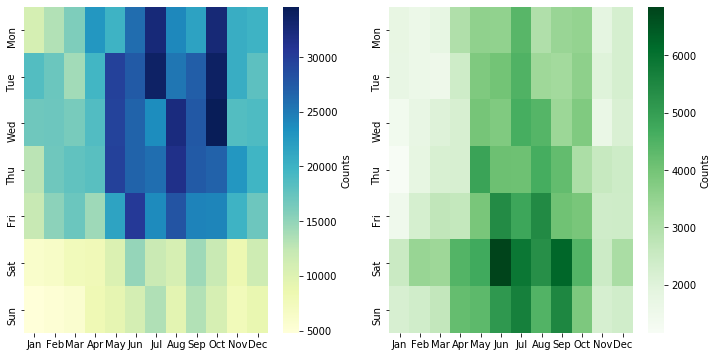

In [36]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

heatmap = pd.pivot_table(df_sub_day, values='bike_id', index='day_of_the_week', columns='month' )
g = sb.heatmap(heatmap, cmap="YlGnBu",cbar_kws={'label': 'Counts'}, ax = ax[0])
g.set_xlabel('')
g.set_ylabel('')

heatmap1 = pd.pivot_table(df_nsub_day, values='bike_id', index='day_of_the_week', columns='month')
g1=sb.heatmap(heatmap1, cmap="Greens",cbar_kws={'label': 'Counts'}, ax = ax[1] )
g1.set_xlabel('')
g1.set_ylabel('');

After separate the subscribers and non subscribers, I can tell that most of non subscribers use bikes during weekends of May to October, and most of subscribers use bikes on weekdays of May to October. And a portion of subscribers still commute by bike during the rainy season, but almost no non subscribers take bikes during rainy season. The busiest day of the week for subscribers are Wednesdays in October and Saturdays in June for non subscribers. Next, I will look at trips taken on each day of month by two types of users.

In [37]:
# prepare the data for heatmap
df_user_day_m = df_18_clean.groupby(['day','month','user_type'], as_index = False)['bike_id'].count()
ordinal_var_dict = {'month':month}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_user_day_m[var] = df_user_day_m[var].astype(ordered_var)
df_sub_day_m = df_user_day_m.query('user_type =="Subscriber"')
df_nsub_day_m = df_user_day_m.query('user_type !="Subscriber"')

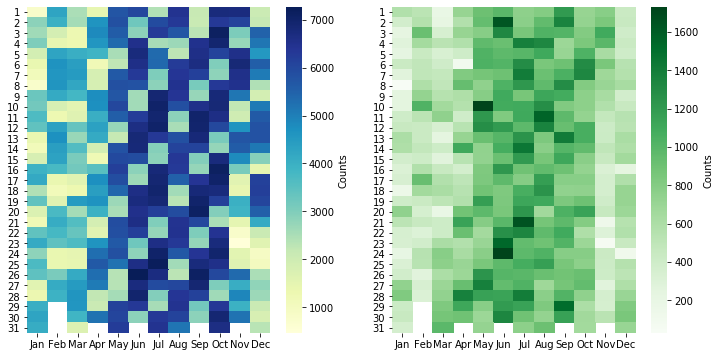

In [38]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

heatmap = pd.pivot_table(df_sub_day_m, values='bike_id', index='day', columns='month' )
g = sb.heatmap(heatmap, cmap="YlGnBu",cbar_kws={'label': 'Counts'}, ax = ax[0])
g.set_xlabel('')
g.set_ylabel('')

heatmap1 = pd.pivot_table(df_nsub_day_m, values='bike_id', index='day', columns='month')
g1=sb.heatmap(heatmap1, cmap="Greens",cbar_kws={'label': 'Counts'}, ax = ax[1] )
g1.set_xlabel('')
g1.set_ylabel('');

The results correspond with the previous finding, nonsubscribers use bikes more during weekends and holiday.
No matter which day in which month subscribers still ride bikes, as long as those are not holidays.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of trips are made on each day of the week in each month by separating the type of users, and the results once again prove that subscribers should mostly be commuters that ride bikes during rush hour on weekdays, on the other hand, non subscribers often ride bikes in the afernoon of weekends and holidays.

### Were there any interesting or surprising interactions between features?

> Most of the findings are expected from the results of bivariate exploration.